In [1]:
# Dostupan je deo policijskih izveštaja o saobraćajnim nesrećama u SAD u periodu 1997 - 2002. 
# Na osnovu dostupnih podataka izvršiti procenu brzine vozila u trenutku sudara (kolona speed). 
# Opis svih atributa je dostupan na pratećoj prezentaciji za ovaj zadatak. Zadatak je uspešno urađen ukoliko se na
# kompletnom testnom skupu podataka dobije makro f1 mera (eng. macro f1 score) veća od 0.30. Zadatak se rešava upotrebom
# ansambla klasifikatora.

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

#classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import LinearSVC, SVC, NuSVC

from sklearn.model_selection import GridSearchCV


#metrics
from sklearn.metrics import f1_score

import sys


import warnings
from sklearn.exceptions import DataConversionWarning
# from sklearn.model_selection import GridSearchCV

In [2]:
def preprocess_data(df):
    encoder = LabelEncoder()

    #weight se izbacuje radi nepreciznosti pokupljenih podataka
    #df = df.drop("weight", axis=1)
    #ova dva se izbacuju jel su reprezentovani u abcat koloni
    #df = df.drop("airbag", axis=1)
    #df = df.drop("deploy", axis=1)
    #izbacuje se jel postoji vrednost injSeverity ako je 6 onda je mrtav
    df = df.drop("dead", axis=1)
    
    #prebacuju kategoricne vrednosti na int
    df["speed"] = encoder.fit_transform(df["speed"])
    df["seatbelt"] = encoder.fit_transform(df["seatbelt"])
    df["frontal"] = encoder.fit_transform(df["frontal"])
    df["sex"] = encoder.fit_transform(df["sex"])
    df["abcat"] = encoder.fit_transform(df["abcat"])
    df["occRole"] = encoder.fit_transform(df["occRole"])
    df["injSeverity"] = encoder.fit_transform(df["injSeverity"])
    
    df["airbag"] = encoder.fit_transform(df["airbag"])
    df["deploy"] = encoder.fit_transform(df["deploy"])

            
    

    
    return df
    
#Iscrtavanje linearne regresije
df = pd.read_csv("train.csv");
pocetak = df.size
print("Na pocetku br elemenata:  :" + str(pocetak))

df = df.dropna()
na_izbaceno = df.size
print("Posle izbacivanja na vrednosti br elemenata:  :" + str(na_izbaceno))
print("Br izvacenih je: " + str(pocetak - na_izbaceno))

#Izvacivanje nepotrebnih kolona i Label encoding za kategoricka obelezja
df = preprocess_data(df)

#da se proveri da li ima na vrednosti u dataframu
#df.isnull().sum()



X = df.drop("speed", axis=1)
Y = df["speed"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#data_train, data_test = train_test_split_random(df, df.size,split=0.7)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y, test_size=0.25, random_state=10)

gradient_boosting = GradientBoostingClassifier(n_estimators=500, random_state=360, max_features=9)
# gradient_boosting = GradientBoostingClassifier(n_estimators=320, subsample=0.9, min_samples_split=0.0001,
#                                                    min_samples_leaf=0.00003, min_weight_fraction_leaf=0.00002,
#                                                    max_depth=6, random_state=360, max_features=9)
gradient_boosting.fit(X_train, Y_train)
Y_pred = gradient_boosting.predict(X_test)
print("Gradient Boosting model f1_score: " + str(f1_score(Y_test, Y_pred, average='macro')))


Na pocetku br elemenata:  :256914
Posle izbacivanja na vrednosti br elemenata:  :249746
Br izvacenih je: 7168


D:\Anaconda\envs\zadatak1\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda\envs\zadatak1\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Gradient Boosting model f1_score: 0.3347448869991746


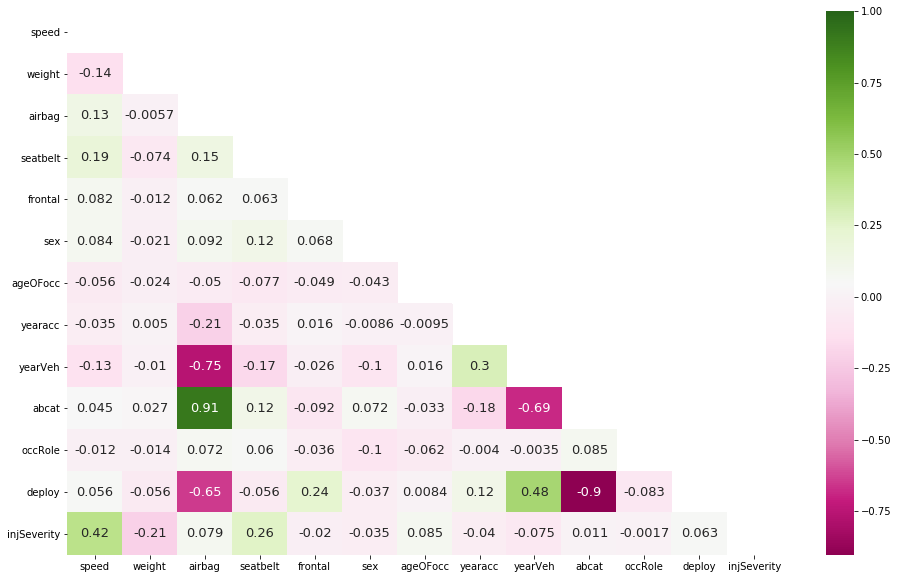

In [3]:
#HEAT MAP KORELACIJE
heatmap_view = df

#ISCRTAVANJE HEAT MAPE RADI ANALIZE PODATAKA
corr = heatmap_view.corr()
mask = np.zeros_like(heatmap_view.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(16,10))
sns.heatmap(heatmap_view.corr(),cmap="PiYG", mask=mask, annot=True, annot_kws={"size" : 13})

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


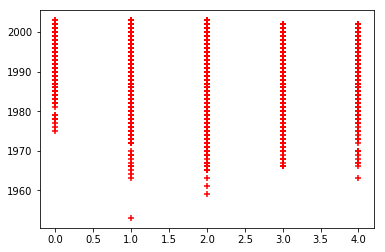

In [12]:
kolone = ['speed', 'seatbelt', 'frontal', 'sex', 'ageOFocc', 'yearacc', 'yearVeh','abcat', 'occRole', 'injSeverity']
plt.scatter(df.speed, df.yearVeh, color='red', marker='+')

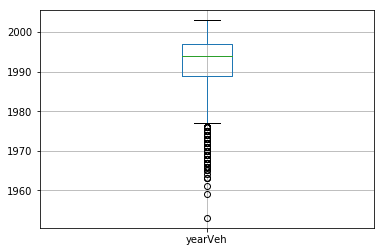

In [21]:
kolone = ['speed', 'seatbelt', 'frontal', 'sex', 'ageOFocc', 'yearacc', 'yearVeh','abcat', 'occRole', 'injSeverity']

box = df[['yearVeh']]
box.boxplot()

In [244]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier(max_features = 12, random_state=10)
decision_tree_classifier.fit(X_train, Y_train)
Y_pred = decision_tree_classifier.predict(X_test)

print("Decision tree classifier model f1_score: " + str(f1_score(Y_test, Y_pred, average='macro')))
# scores = cross_val_score(DecisionTreeClassifier(), X_train, Y_train, cv=7)
# scores.mean()

Decision tree classifier model f1_score: 0.29770951709633453


In [152]:
lr = LogisticRegression(random_state=2)
lr.fit(X_train, Y_train) 
Y_pred = lr.predict(X_test)

print("Bagging decision tree classifier model f1_score: " + str(f1_score(Y_test, Y_pred, average='macro')))

Bagging decision tree classifier model f1_score: 0.20963933848762392


D:\Anaconda\envs\zadatak1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\envs\zadatak1\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda\envs\zadatak1\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [60]:
# from sklearn.ensemble import BaggingClassifier #Malo sporiji

# bagging_model = BaggingClassifier(base_estimator=decision_tree_classifier, n_estimators=150) 
# bagging_model.fit(X_train, Y_train) 
# Y_pred = bagging_model.predict(X_test)

# print("Bagging decision tree classifier model f1_score: " + str(f1_score(Y_test, Y_pred, average='macro')))

Bagging decision tree classifier model f1_score: 0.29513141522322345


In [232]:
# from sklearn.ensemble import RandomForestClassifier

# random_forest_classifier = RandomForestClassifier(n_estimators=250, max_features=12)
# random_forest_classifier.fit(X_train, Y_train)
# Y_pred = random_forest_classifier.predict(X_test)

# print("Decision tree classifier model f1_score: " + str(f1_score(Y_test, Y_pred, average='macro')))

Decision tree classifier model f1_score: 0.3457030655918044


In [238]:
# from sklearn.ensemble import BaggingClassifier

# bagging_decision_tree_model = BaggingClassifier(base_estimator=decision_tree_classifier, max_samples=12, n_estimators=200)


# bag_model.fit(X_train, Y_train)
# bag_model.oob_score_
# Y_pred = bag_model.predict(X_test)

# print("Bagging model f1_score: " + str(f1_score(Y_test, Y_pred, average='macro')))

Bagging model f1_score: 0.32950577471420806


In [79]:
# ada_boost = AdaBoostClassifier(n_estimators=100, learning_rate=0.6, random_state=10)
# ada_boost.fit(X_train, Y_train)
# Y_pred = ada_boost.predict(X_test)
# print("Ada boost model f1_score: " + str(f1_score(Y_test, Y_pred, average='macro')))

Ada boost model f1_score: 0.2972405566527333


D:\Anaconda\envs\zadatak1\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [80]:
# #Prilicno spor

# gradient_boosting = GradientBoostingClassifier(n_estimators=320, subsample=0.9, min_samples_split=0.0001,
#                                                    min_samples_leaf=0.00003, min_weight_fraction_leaf=0.00002,
#                                                    max_depth=6, random_state=360, max_features=9)
# gradient_boosting.fit(X_train, Y_train)
# Y_pred = gradient_boosting.predict(X_test)
# print("Gradient Boosting model f1_score: " + str(f1_score(Y_test, Y_pred, average='macro')))


Gradient Boosting model f1_score: 0.30039699008263143


In [81]:
# gaussian_naive_bayes = GaussianNB(var_smoothing=1e-5)
# gaussian_naive_bayes.fit(X_train, Y_train)
# Y_pred = gaussian_naive_bayes.predict(X_test)
# print("Gausian Naive Bayes model f1_score: " + str(f1_score(Y_test, Y_pred, average='macro')))


Gausian Naive Bayes model f1_score: 0.25431973200106456


D:\Anaconda\envs\zadatak1\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [86]:
# from sklearn.svm import SVC
# svm = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
#     max_iter=-1, probability=False, random_state=None, shrinking=True,
#     tol=0.001, verbose=False)

# svm.fit(X_train, Y_train)
# Y_pred = svm.predict(X_test)
# print("Gausian Naive Bayes model f1_score: " + str(f1_score(Y_test, Y_pred, average='macro')))

Gausian Naive Bayes model f1_score: 0.20492514274013546


D:\Anaconda\envs\zadatak1\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [146]:
# #AKO NIJE DOBAR REZULTAT ONDA MOZES DA PROBAS DA IZBACIS OUTLIERE IZ NEKIH PA MOZDA BUDE BOLJI REZUTAT

# #kolone = ['speed', 'seatbelt', 'frontal', 'sex', 'ageOFocc', 'yearacc', 'yearVeh','abcat', 'occRole', 'injSeverity']
# #df.yearVeh.value_counts()

# #PRONAZENJE PARAMETARA ZA OUTLIERE
# def up_down(df):
#     Q1 = df.describe().loc['25%']
#     Q3 = df.describe().loc['75%']

#     IQR_ageOFocc = Q3[0] - Q1[0]
#     IQR_yearVeh = Q3[1] - Q1[1]

#     #Racunanje whiskera gore i dole
#     UP_ageOFocc = Q3[0] + (1.5 *  IQR_ageOFocc)
#     DOWN_ageOFocc = Q1[0] - (1.5 *  IQR_ageOFocc)

#     UP_yearVeh = Q3[1] + (1.5 *  IQR_yearVeh)
#     DOWN_yearVeh = Q1[1] - (1.5 *  IQR_yearVeh)

#     return [UP_ageOFocc,DOWN_ageOFocc,UP_yearVeh,DOWN_yearVeh]


# def takeout_outliers(df, up_w, down_w, up_sp, down_sp):
#     indexes = []
#     counter = 0
#     for i in df.ageOFocc:
#         if i > up_w or i < down_w:
#             indexes.append(counter)
#         counter += 1

#     counter = 0
#     for i in df.yearVeh:
#         if i > up_sp or i < down_sp:
#             indexes.append(counter)
#         counter += 1
    
#     data = df.drop(indexes)
#     return data, indexes

# #https://www.youtube.com/watch?v=RtrBtAKwcxQ&ab_channel=codebasics
# #YT VIDEO ASAMBLA
# #MAIN METODA
# warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# df = pd.read_csv("train.csv");
# #Izbacivanje na vrednosit iz dataFrame-a
# df = df.dropna()

# #Izvacivanje nepotrebnih kolona i Label encoding za kategoricka obelezja
# df = preprocess_data(df)
# #print(df.iloc[0, :])

# up_a, down_a, up_y , down_y = up_down(df)
# print(up_down(df))

# df = df.reset_index(drop=True)
# # print(df.iloc[36, :])
# # print(df.iloc[37, :])
# # print(df.iloc[38, :])
# print("before: " + str(df.size))
# df, indexes = takeout_outliers(df, up_a, down_a, up_y , down_y)
# print("after: " + str(df.size))
# print(indexes)

# #df[['speed', 'weight']].boxplot(column ='speed', grid = False)
# #box = df[['speed', 'weight']]
# # kolone = ['speed', 'seatbelt', 'frontal', 'sex', 'ageOFocc', 'yearacc', 'yearVeh','abcat', 'occRole', 'injSeverity']
# # a = df[['yearVeh']]

# # #IMJAU OUTLIERE
# # #speed
# # #ageOfocc - ima outliere malkice
# # #yearVeh - ima dosta

# # a.boxplot( grid = False)

# # #box.boxplot(column ='speed', grid = False)
# # # IZBACIVANJE OUTLIERA
# # [up_w,down_w,up_sp,down_sp] = up_down(df)
# # df = takeout_outliers(df,up_w,down_w,up_sp,down_sp)

# # print("Element number after IQR outlyer removed: " + str(df.X.size))
# #df.isnull().sum()
# # Q1 = df.describe().loc['25%']
# # Q1

In [261]:
for i in range(5):
    #MAIN METODA
    warnings.filterwarnings(action='ignore', category=DataConversionWarning)

    df = pd.read_csv("train.csv");
    # df_test = pd.read_csv("test_preview.csv");
    #Izbacivanje na vrednosit iz dataFrame-a
    df = df.dropna()

    #Izvacivanje nepotrebnih kolona i Label encoding za kategoricka obelezja
    df = preprocess_data(df)

    from scipy import stats
    df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

    X = df.drop("speed", axis=1)
    Y = df["speed"]

    # scaler = StandardScaler()
    # X_scaled = scaler.fit_transform(X)

    X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y, test_size=0.1, random_state=10)

    #X_train
    #X_scaled

    #Bagging
    decision_tree_classifier = DecisionTreeClassifier(max_features = 12, random_state=10)
    bagging_decision_tree_model = BaggingClassifier(base_estimator=decision_tree_classifier, max_samples=12, n_estimators=300)
    random_forest_classifier = RandomForestClassifier(n_estimators=300, max_features=12)
    # gaussian_naive_bayes = GaussianNB(var_smoothing=1e-5)


    #Boosting
    ada_boost = AdaBoostClassifier(n_estimators=152, learning_rate=1.52, random_state=100)
    gradient_boosting = GradientBoostingClassifier(n_estimators=500, random_state=360, max_features=9)

    #stacking
    estimators_list = [('ada_boost_classifier', ada_boost),('gradient_boosting_classifier', gradient_boosting),
                       ('random_forest_classifier', random_forest_classifier),('bagging_decision_tree_classifier', bagging_decision_tree_model),
                       ('decision_tree_classifier', decision_tree_classifier)]

    stacking = VotingClassifier(estimators_list, weights=[1, 1.1, 0.8, 0.2, 0.1])

    stacking.fit(X_train, Y_train)
    Y_pred = stacking.predict(X_test)

    print(f1_score(Y_test, Y_pred, average='macro'))

0.32617050623582056
0.33262902794257687
0.3278991054743539
0.3393815974486649
0.3290530497570185


In [251]:
# import sys

# if(len(sys.argv) != 3):
#     print("Mora imati dva argumenta 'train.csv' 'test.csv'")
#     exit()
# else:
#     train_csv = sys.argv[1]
#     test_csv = sys.argv[2]   
    
#     df_train = pd.read_csv(train_csv)
#     df_test = pd.read_csv(test_csv)
    
#     #Izvacivanje nepotrebnih kolona i Label encoding za kategoricka obelezja
#     df_train = preprocess_data(df_train)

#     X_train = df_train.drop("speed", axis=1)
#     Y_train = df_train["speed"]
    
#     X_train = df_test.drop("speed", axis=1)
#     Y_train = df_test["speed"]

#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.fit_transform(X_test)

#     #Bagging
#     decision_tree_classifier = DecisionTreeClassifier(random_state=10)
#     bagging_decision_tree_model = BaggingClassifier(base_estimator=decision_tree_classifier, n_estimators=200)
#     random_forest_classifier = RandomForestClassifier(n_estimators=200, max_features=3)
#     # gaussian_naive_bayes = GaussianNB(var_smoothing=1e-5)


#     #Boosting
#     ada_boost = AdaBoostClassifier(n_estimators=200, learning_rate=0.6, random_state=10)
#     gradient_boosting = GradientBoostingClassifier(n_estimators=200, subsample=0.9, min_samples_split=0.0001,
#                                                        min_samples_leaf=0.00003, min_weight_fraction_leaf=0.00002,
#                                                        max_depth=6, random_state=360, max_features=9)

#     #stacking
#     estimators_list = [('ada_boost_classifier', ada_boost),('gradient_boosting_classifier', gradient_boosting),
#                        ('random_forest_classifier', random_forest_classifier),('bagging_decision_tree_classifier', bagging_decision_tree_model),
#                        ('decision_tree_classifier', decision_tree_classifier)]

#     stacking = VotingClassifier(estimators_list)

#     stacking.fit(X_train, Y_train)
#     Y_pred = stacking.predict(X_test)

#     print(f1_score(Y_test, Y_pred, average='macro'))

0
1
2
3
4
